In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

df=pd.read_csv('DailyDelhiClimateTrain.csv',index_col='date' ,parse_dates=True)
df=df.dropna()
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [16]:
print('Shape of data',df.shape)

Shape of data (1462, 4)


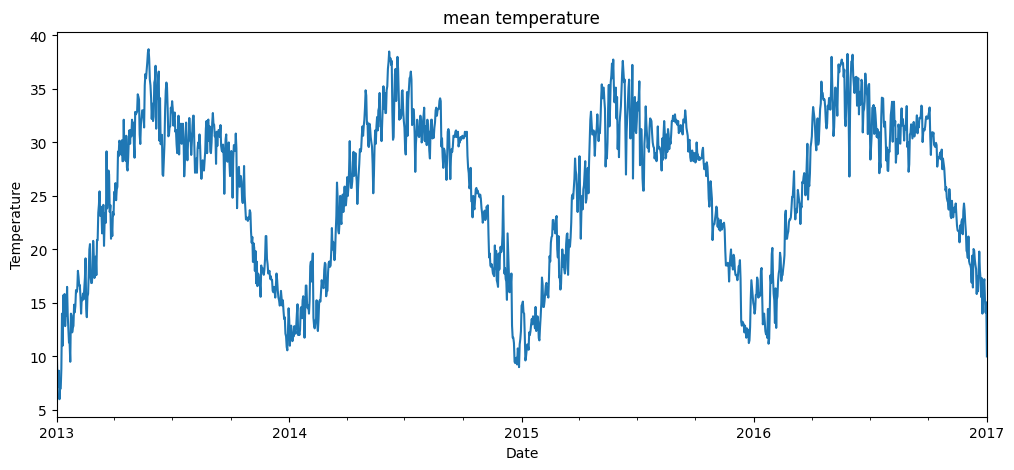

In [17]:
df['meantemp'].plot(figsize=(12, 5))
plt.title('mean temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

In [18]:
# Preprocess the data
data = df['meantemp'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [19]:
sequence_length = 30

In [20]:
# Prepare data for training
X, y = [], []
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i+sequence_length, 0])
    y.append(data_scaled[i+sequence_length, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  #(number of samples, sequence length=30, number of features=1)

In [21]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(X.shape[1], 1), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1361 (5.32 KB)
Trainable params: 1361 (5.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
history = model.fit(X, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
45/45 [==============================] - 1s 2ms/step - loss: 0.0052
Epoch 2/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 3/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 4/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 5/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 6/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 7/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 8/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 9/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 10/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 11/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 12/50
45/45 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 13/50
45/45 [==============================

In [23]:
predictions_scaled = model.predict(X)
predictions = scaler.inverse_transform(predictions_scaled).flatten()

45/45 [==============================] - 0s 1ms/step


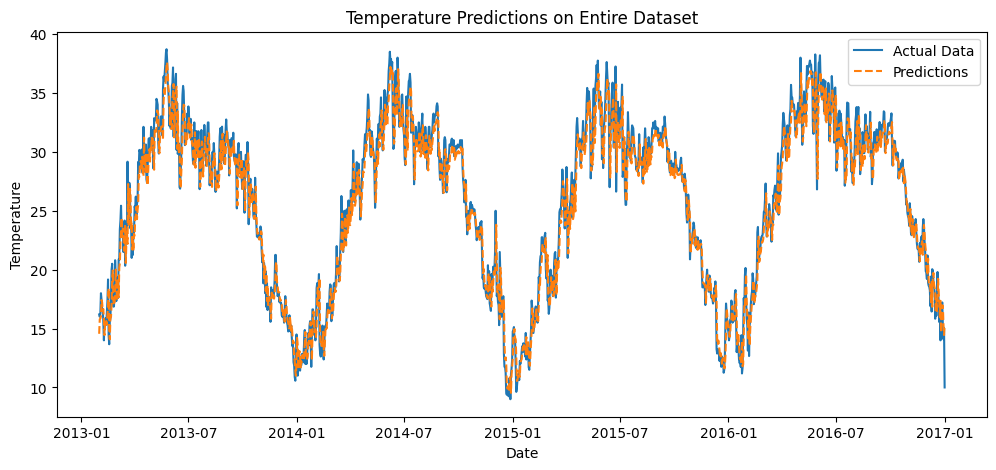

In [24]:
plt.figure(figsize=(12, 5))
plt.plot(df.index[sequence_length:], df['meantemp'][sequence_length:], label='Actual Data')
plt.plot(df.index[sequence_length:], predictions, label='Predictions', linestyle='dashed')
plt.title('Temperature Predictions on Entire Dataset')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt

actual_temps = df['meantemp'][sequence_length:].values
predicted_temps = predictions 

mse = mean_squared_error(actual_temps, predicted_temps)
rmse = sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1.6344489620741882


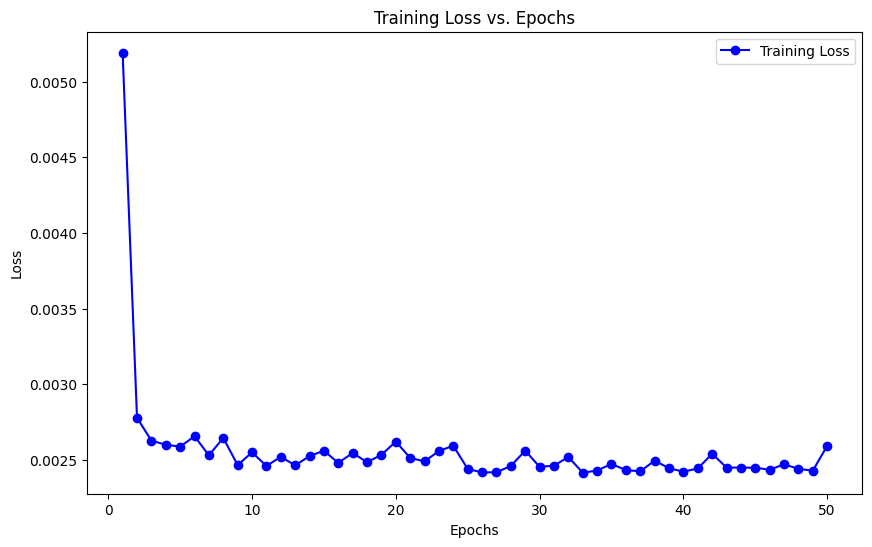

In [26]:
loss = history.history['loss']

# Extract the number of epochs
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.title('Training Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()